In [2]:
import pandas as pd

In [5]:
df = pd.read_csv("GSE156251data.txt",sep="\t",index_col=0)

In [6]:
df.head()

,GSM4727609r,GSM4727610r,GSM4727611r,GSM4727612r,GSM4727609g,GSM4727610g,GSM4727611g,GSM4727612g
Gene,,,,,,,,
0610007L01Rik,4090.0,3290.0,3590.0,3140.0,4870.0,4610.0,4500.0,4820.0
0610007P08Rik,405.0,457.0,438.0,572.0,253.0,244.0,321.0,237.0
0610007P14Rik,492.0,484.0,428.0,466.0,873.0,820.0,825.0,826.0
0610007P22Rik,1920.0,1940.0,2000.0,1890.0,1690.0,1770.0,1840.0,1610.0
0610008F07Rik,3930.0,2500.0,2240.0,2360.0,3370.0,3080.0,2850.0,3520.0


In [8]:
import numpy as np
!pip install scipy
from scipy.stats import ttest_ind

In [9]:
control_samples = df.loc[:, ["GSM4727609r","GSM4727610r","GSM4727611r","GSM4727612r",]]  # control columns
disease_samples = df.loc[:, ["GSM4727609g","GSM4727610g","GSM4727611g","GSM4727612g",]]  # disease columns

In [10]:
control_samples.head()

,GSM4727609r,GSM4727610r,GSM4727611r,GSM4727612r
Gene,,,,
0610007L01Rik,4090.0,3290.0,3590.0,3140.0
0610007P08Rik,405.0,457.0,438.0,572.0
0610007P14Rik,492.0,484.0,428.0,466.0
0610007P22Rik,1920.0,1940.0,2000.0,1890.0
0610008F07Rik,3930.0,2500.0,2240.0,2360.0


In [11]:
disease_samples.head()

,GSM4727609g,GSM4727610g,GSM4727611g,GSM4727612g
Gene,,,,
0610007L01Rik,4870.0,4610.0,4500.0,4820.0
0610007P08Rik,253.0,244.0,321.0,237.0
0610007P14Rik,873.0,820.0,825.0,826.0
0610007P22Rik,1690.0,1770.0,1840.0,1610.0
0610008F07Rik,3370.0,3080.0,2850.0,3520.0


In [12]:
p_values = []
log2_fc = []

for gene in df.index:
    control_expr = control_samples.loc[gene]
    disease_expr = disease_samples.loc[gene]
    # Perform t-test
    stat, p = ttest_ind(control_expr, disease_expr, equal_var=False)
    p_values.append(p)
     # Calculate log2 fold change
    fc = disease_expr.mean() / control_expr.mean()
    log2_fc.append(np.log2(fc))
# Store results in DataFrame
deg_results = pd.DataFrame({"Gene": df.index, "log2FC": log2_fc, "p-value": p_values})

In [13]:
deg_results.head()

,Gene,log2FC,p-value
0,0610007L01Rik,0.414015,0.006626
1,0610007P08Rik,-0.827337,0.005368
2,0610007P14Rik,0.838537,0.000001
3,0610007P22Rik,-0.165511,0.016692
4,0610008F07Rik,0.216963,0.350774


In [14]:
!pip install statsmodels
from statsmodels.stats.multitest import multipletests

# Adjust p-values using Benjamini-Hochberg (FDR)
deg_results["adj_p-value"] = multipletests(deg_results["p-value"], method="fdr_bh")[1]

In [15]:
deg_results.head()

,Gene,log2FC,p-value,adj_p-value
0,0610007L01Rik,0.414015,0.006626,0.022771
1,0610007P08Rik,-0.827337,0.005368,0.020112
2,0610007P14Rik,0.838537,0.000001,0.000336
3,0610007P22Rik,-0.165511,0.016692,0.040634
4,0610008F07Rik,0.216963,0.350774,0.415326


In [16]:
# Set thresholds for significance
log2fc_threshold = 1.0  # At least 2-fold change
pval_threshold = 0.05   # Statistically significant

deg_filtered = deg_results[
    (abs(deg_results["log2FC"]) > log2fc_threshold) & (deg_results["adj_p-value"] < pval_threshold)
]
deg_filtered.to_csv("deg_filtered.csv")
print(deg_filtered)

                Gene    log2FC       p-value  adj_p-value
34     1110020A21Rik  3.267989  2.381901e-05     0.000958
39     1110028C15Rik  1.199139  2.404995e-04     0.003340
117    1700011I03Rik  1.188045  2.064559e-04     0.003071
243    1810041L15Rik -1.185837  6.701585e-03     0.022914
281    2210408I21Rik  1.232923  4.603464e-05     0.001325
...              ...       ...           ...          ...
14517         Zfp606  1.035718  3.788568e-05     0.001191
14524         Zfp618  1.649467  4.920764e-04     0.005052
14618          Zfpm2  1.344224  4.913668e-07     0.000178
14624         Zfyve1  1.269593  4.143032e-04     0.004563
14656          Zmiz2 -1.033976  6.857677e-03     0.023243

[722 rows x 4 columns]


In [17]:
deg_filtered["log2FC"].dtype

dtype('float64')

In [18]:
!pip install matplotlib
!pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns

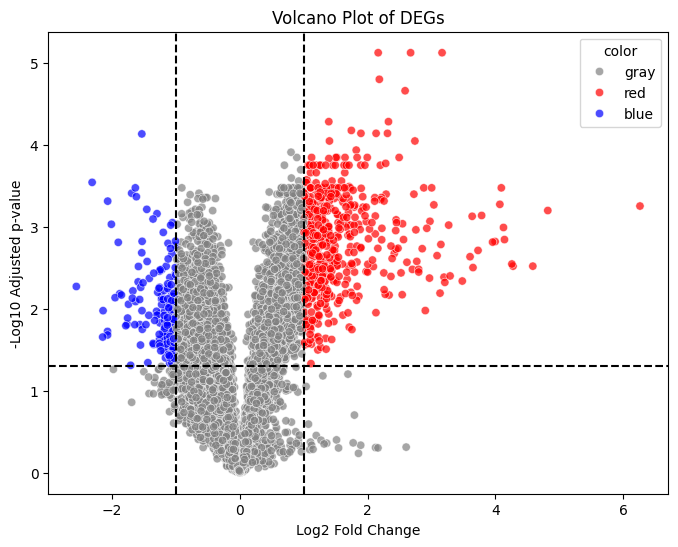

In [19]:
# Assign colors for up/down-regulated genes
deg_results["color"] = "gray"
deg_results.loc[(deg_results["log2FC"] > log2fc_threshold) & (deg_results["adj_p-value"] < pval_threshold), "color"] = "red"
deg_results.loc[(deg_results["log2FC"] < -log2fc_threshold) & (deg_results["adj_p-value"] < pval_threshold), "color"] = "blue"

plt.figure(figsize=(8,6))
sns.scatterplot(x="log2FC", y=-np.log10(deg_results["adj_p-value"]), hue=deg_results["color"], palette={"red":"red", "blue":"blue", "gray":"gray"}, alpha=0.7,data=deg_results)
plt.axhline(-np.log10(pval_threshold), linestyle="--", color="black")
plt.axvline(-log2fc_threshold, linestyle="--", color="black")
plt.axvline(log2fc_threshold, linestyle="--", color="black")
plt.xlabel("Log2 Fold Change")
plt.ylabel("-Log10 Adjusted p-value")
plt.title("Volcano Plot of DEGs")
plt.savefig("volcano_plot.jpg", dpi=300, bbox_inches="tight", format="jpg")
plt.show()

In [20]:
deg_results.to_csv("deg_results.csv")

In [21]:
plt.savefig("volcano_plot.jpg", dpi=300, bbox_inches="tight", format="jpg")

<Figure size 640x480 with 0 Axes>

In [22]:
deg_filtered.dtypes

Gene            object
log2FC         float64
p-value        float64
adj_p-value    float64
dtype: object

In [23]:
df_deg=deg_results

In [24]:
top_DEGs = df_deg[(df_deg["log2FC"].abs() > 1) & (df_deg["adj_p-value"] < 0.05)]  # Adjust threshold if needed

In [25]:
top_DEGs.head()

,Gene,log2FC,p-value,adj_p-value,color
34,1110020A21Rik,3.267989,0.000024,0.000958,red
39,1110028C15Rik,1.199139,0.000240,0.003340,red
117,1700011I03Rik,1.188045,0.000206,0.003071,red
243,1810041L15Rik,-1.185837,0.006702,0.022914,blue
281,2210408I21Rik,1.232923,0.000046,0.001325,red


In [26]:
df.head()

,GSM4727609r,GSM4727610r,GSM4727611r,GSM4727612r,GSM4727609g,GSM4727610g,GSM4727611g,GSM4727612g
Gene,,,,,,,,
0610007L01Rik,4090.0,3290.0,3590.0,3140.0,4870.0,4610.0,4500.0,4820.0
0610007P08Rik,405.0,457.0,438.0,572.0,253.0,244.0,321.0,237.0
0610007P14Rik,492.0,484.0,428.0,466.0,873.0,820.0,825.0,826.0
0610007P22Rik,1920.0,1940.0,2000.0,1890.0,1690.0,1770.0,1840.0,1610.0
0610008F07Rik,3930.0,2500.0,2240.0,2360.0,3370.0,3080.0,2850.0,3520.0


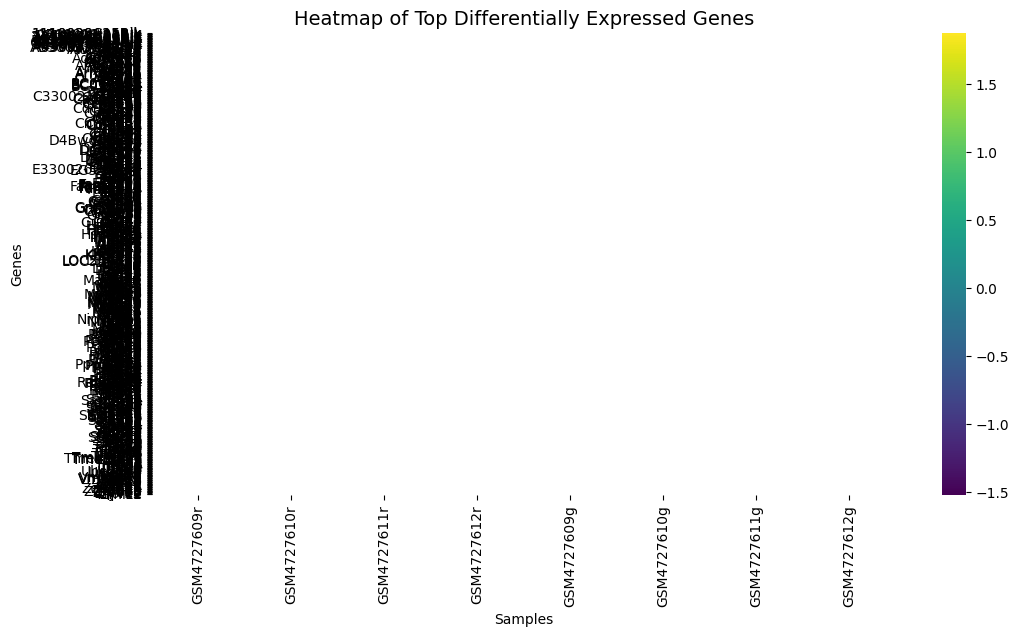

In [27]:
# 🔹 Normalize (Z-score) the data for visualization
df_heatmap= df.loc[top_DEGs["Gene"]]  # Extract only DEG expression values
df_normalized = (df_heatmap - df_heatmap.mean(axis=1).values[:, None]) / df_heatmap.std(axis=1).values[:, None]

# 🔹 Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df_normalized, cmap="viridis",linewidths=0.5, yticklabels=True, xticklabels=True)

# 🔹 Beautify the plot
plt.title("Heatmap of Top Differentially Expressed Genes", fontsize=14)
plt.xlabel("Samples")
plt.ylabel("Genes")
plt.show()

In [28]:
df_normalized.head()

,GSM4727609r,GSM4727610r,GSM4727611r,GSM4727612r,GSM4727609g,GSM4727610g,GSM4727611g,GSM4727612g
Gene,,,,,,,,
1110020A21Rik,-0.931589,-0.910484,-0.880146,-1.001499,0.990287,0.858381,1.095813,0.779237
1110028C15Rik,-0.803758,-0.992928,-0.851910,-1.025602,1.086223,1.017434,1.051828,0.518713
1700011I03Rik,-0.870820,-0.985182,-0.461022,-1.271088,1.235349,0.825552,0.949444,0.577767
1810041L15Rik,0.076690,0.710321,1.414357,1.203146,-1.140286,-0.778210,-0.868729,-0.617288
2210408I21Rik,-0.982487,-0.888917,-1.035510,-0.789108,0.764156,0.810941,1.232007,0.888917


<Figure size 3000x3000 with 0 Axes>

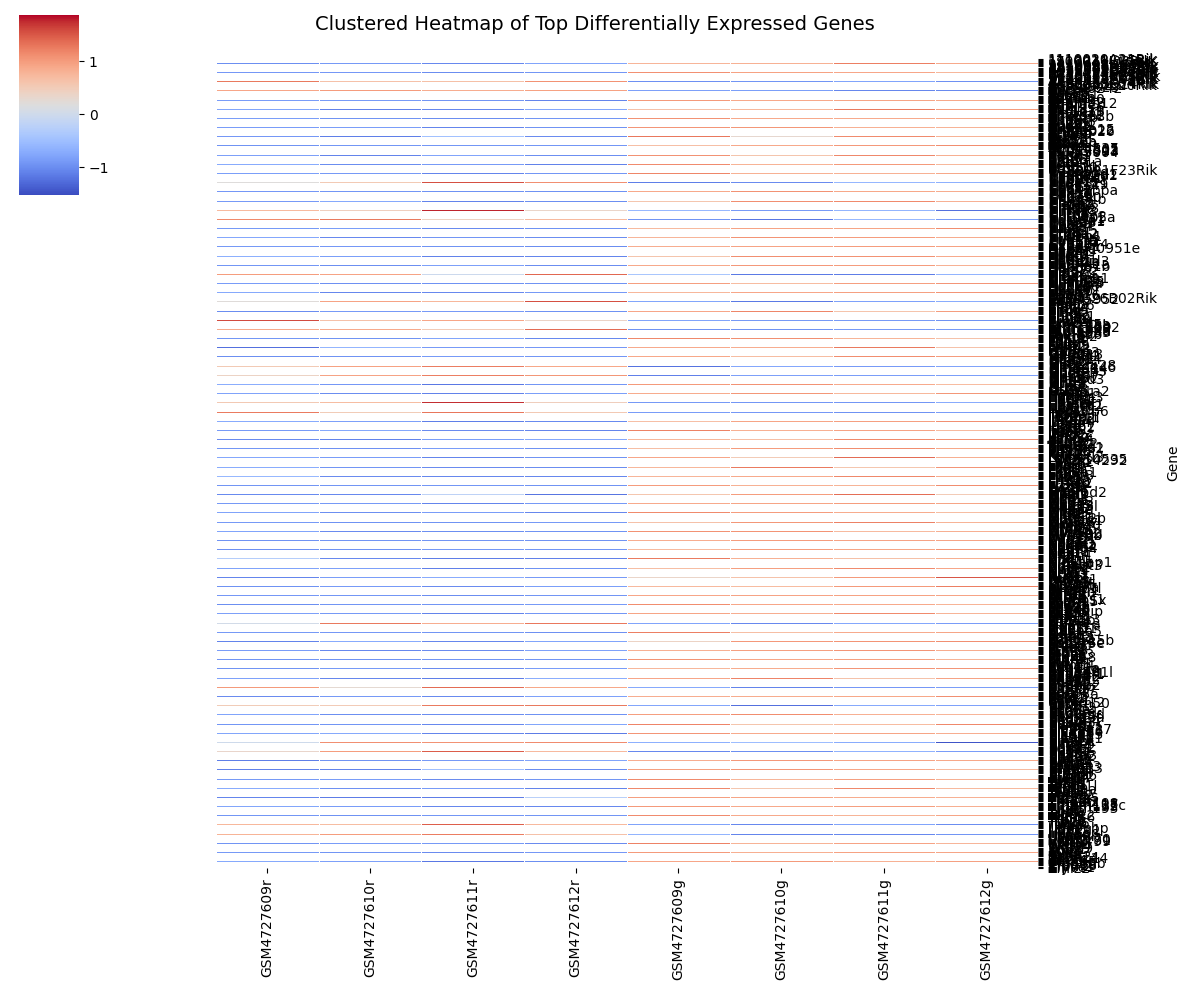

In [29]:
# 🔹 Filter for DEGs
top_DEGs = df_deg[(df_deg["log2FC"].abs() > 1) & (df_deg["adj_p-value"] < 0.05)]  # Adjust threshold if needed
df_heatmap = df.loc[top_DEGs["Gene"]]  # Extract only DEG expression values

# 🔹 Normalize (Z-score transform) each gene
df_normalized = (df_heatmap - df_heatmap.mean(axis=1).values[:, None]) / df_heatmap.std(axis=1).values[:, None]

# 🔹 Perform hierarchical clustering and plot
plt.figure(figsize=(30, 30))
sns.clustermap(df_normalized, cmap="coolwarm", method="ward", metric="euclidean",
               figsize=(12, 10), linewidths=0.5, yticklabels=True, xticklabels=True,
               row_cluster=False, col_cluster=False, dendrogram_ratio=(0.2, 0.05))

# 🔹 Beautify plot
plt.suptitle("Clustered Heatmap of Top Differentially Expressed Genes", fontsize=14)
plt.show()

In [27]:
df_deg.columns

Index(['Gene', 'log2FC', 'p-value', 'adj_p-value', 'color'], dtype='object')